# Implementation of ANN using Keras:

 # Objective is to create a neural network for identifying numbers based on handwritten digits(0 to 9). For example, when the input to the network is an image of a handwritten number 8, the corresponding prediction must also be the digit 8.

In [ ]:
# Importing Libraries

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [ ]:
# Checking version of Tensorflow ans Keras

print(f"Tensorflow Version {tf.__version__}")
print(f"Keras Version {tf.keras.__version__}")

Tensorflow Version 2.12.0
Keras Version 2.12.0


In [ ]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
tf.config.list_physical_devices("CPU")

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [ ]:
check_list = ['GPU','CPU']

for device in check_list:
  out = tf.config.list_physical_devices(device)
  if len(out) > 0:
    print(f"{device} is available!")
    print(f"Details >> {out}")
  else:
    print(f"{device} isn't available!")

GPU is available!
Details >> [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
CPU is available!
Details >> [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [ ]:
# Creating a simple classifier using keras on MNIST data

In [ ]:
# Loading the data From keras.dataset:
mnist = tf.keras.datasets.mnist

In [ ]:
# Splitting the Data into Train and Test:
(X_train_full , y_train_full) , (X_test , y_test) = mnist.load_data()

In [ ]:
print(f"data type of X_train_full: {X_train_full.dtype},\nshape of X_train_full: {X_train_full.shape}")

data type of X_train_full: uint8,
shape of X_train_full: (60000, 28, 28)


In [ ]:
# 60,000 training datasets with 28 by 28 matrix input

In [ ]:
print(f"data type of X_train_full: {X_test.dtype},\nshape of X_test: {X_test.shape}")

data type of X_train_full: uint8,
shape of X_test: (10000, 28, 28)


In [ ]:
# 10,000 testing datasets with 28 by 28 matrix input

In [ ]:
len(X_train_full[0][1])   # 28x28 matrix:

28

In [ ]:
# Creating a Validation dataset from X_train_full and y_train_full datasets
# X_train_full  ->  X_valid and X_train
# y_train_full  ->  y_valid and y_train
# Scale the data between 0 to 1 by dividing it by 255. as its an unsigned data between 0-255 range


In [ ]:
# X_valid - first 5000 data for validation and rest 55000 for training - scaled down between 0 to 1 by / with 255 (as data ranges between 0 to 255)
# y_valid - first 5000 data for validation and rest 55000 for training -  not scaled down cause its the actual output

X_valid,X_train = X_train_full[:5000]/255. , X_train_full[5000:]/255
y_valid,y_train = y_train_full[:5000], y_train_full[5000:]

X_test = X_test/255.

In [ ]:
len(X_valid)

5000

In [ ]:
len(X_train)

55000

In [ ]:
len(y_valid)

5000

In [ ]:
len(y_train)

55000

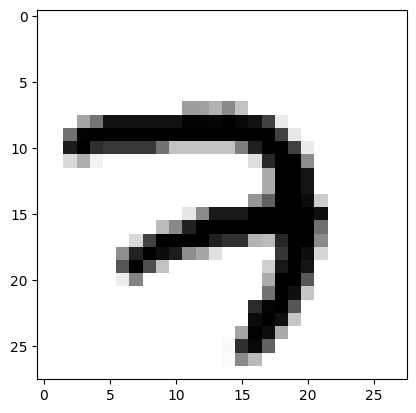

In [ ]:
# PLOTTING THE IMAGE:

plt.imshow(X_train[0],cmap="binary")
plt.show()

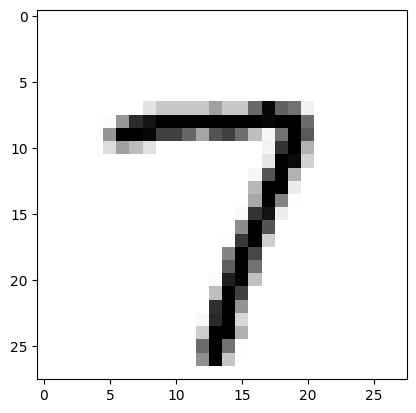

In [ ]:
plt.imshow(X_train[100],cmap="binary")
plt.show()

<Axes: >

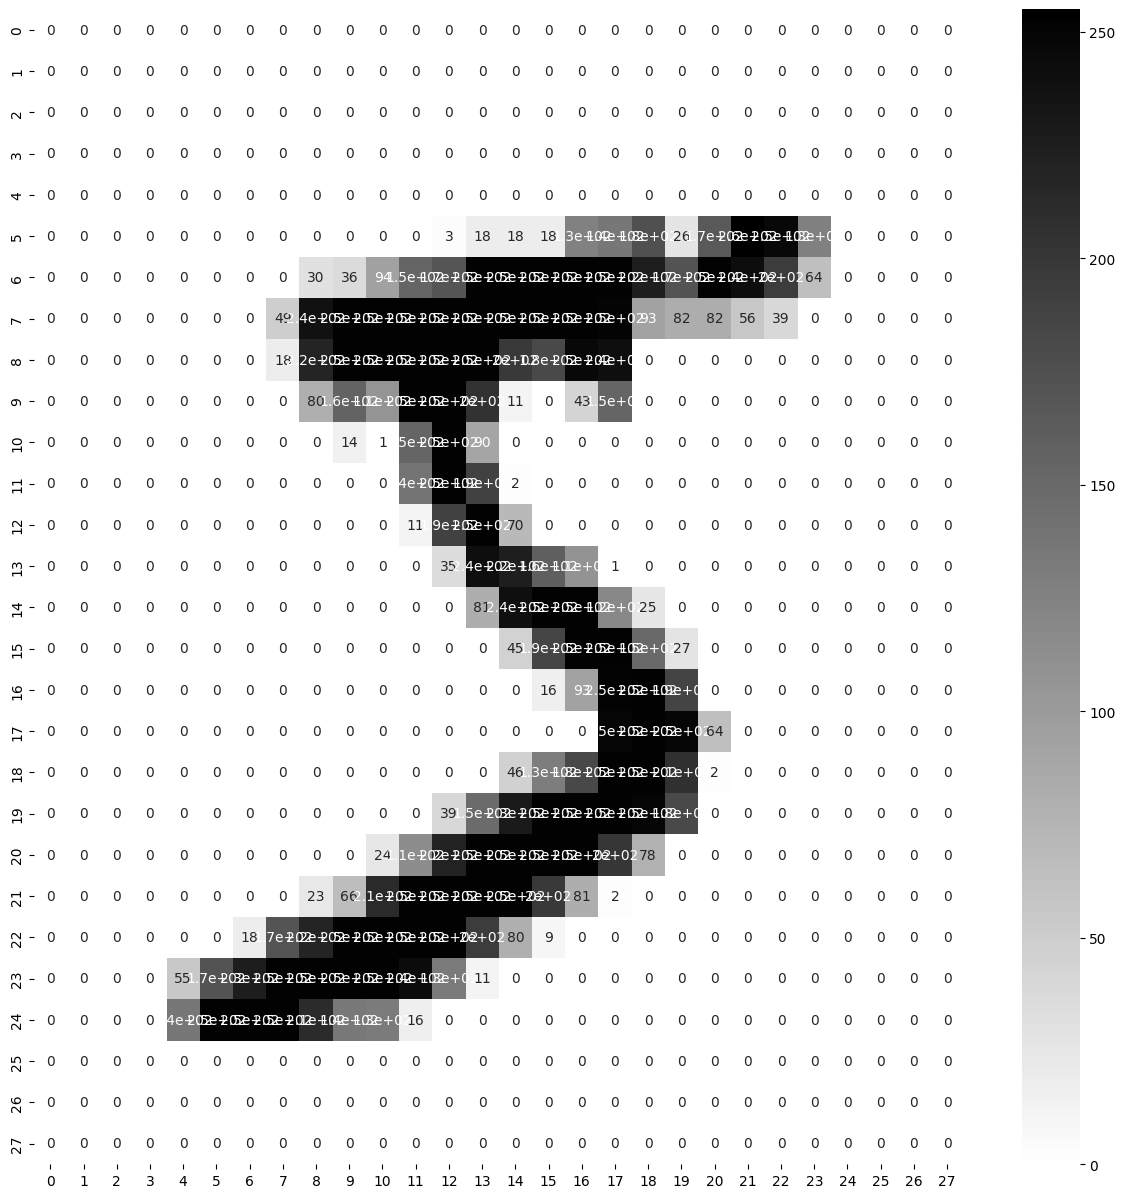

In [ ]:
# PLOT OF AN IMAGE THAT IS NOT SCALED DOWN:

plt.figure(figsize=(15,15))
sns.heatmap(X_train_full[0],annot=True,cmap="binary")

<Axes: >

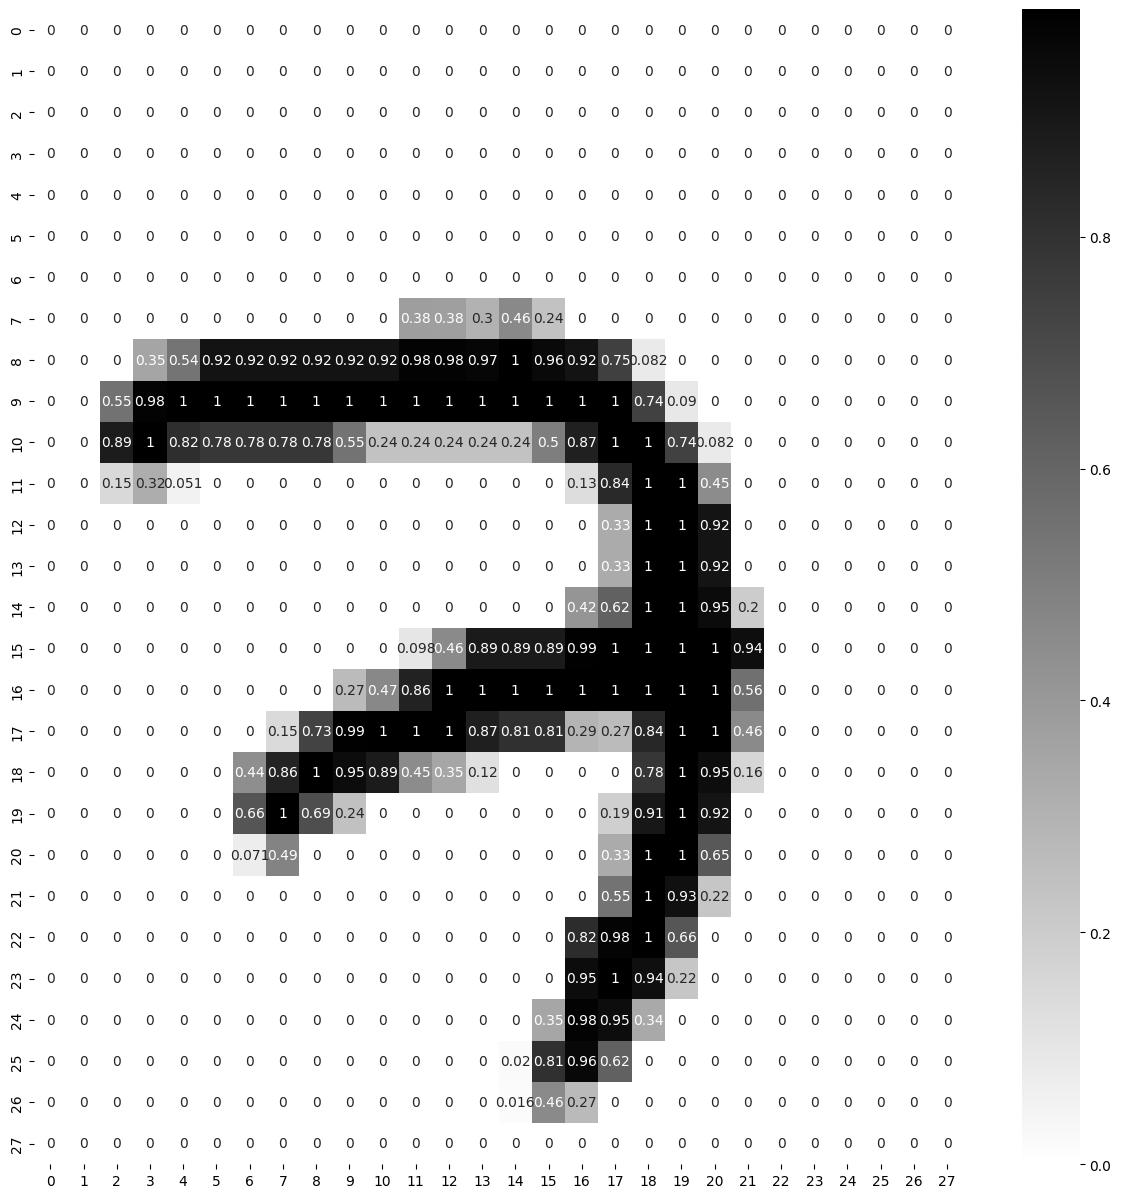

In [ ]:
# PLOT OF THE NEW TRAINING DATA WHCH IS SCALED DOWN BETWEEN 0 TO 1:(DIVIDED BY 255)

plt.figure(figsize=(15,15))
sns.heatmap(X_train[0], annot=True, cmap="binary")

In [ ]:
# CREATING LAYERS OF ANN(PERCEPTRON)


In [ ]:
# METHOD-1
LAYERS = [
    tf.keras.layers.Flatten(input_shape=[28,28],name="input_layer"),
    # flatten() function is used to flatten the input, without affecting the batch size. A Flatten layer flattens each batch in the inputs to 1-dimension
    # will convert 28x28 matrix input into Single Inputs:

    tf.keras.layers.Dense(300,activation="relu",name="hidden_layer_1"),
    # The tf.layers.Dense() is an inbuilt function of Tensorflow. js library. This function is used to create fully connected layers, in which every output depends on every input.

    tf.keras.layers.Dense(100,activation="relu",name="hidden_layer_2"),

    tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")
    # Softmax Activation Function for Multiclass Classification Problem:
]


In [ ]:
# FIRST(INPUT) LAYER - INPUT LAYER CONSIST OF 784 RECORDS(28*28)  WHICH ARE FLATTEN BETWEEN 0 TO 1
# SECOND LAYER - LAYER CONSISTING OF 300 NEURONS(UNITS)
# THIRD LAYER - LAYER CONSISTING OF 100 NEURONS(UNITS)
# OUTPUT LAYER - 10 NEURONS FOR (0 TO 9)


In [ ]:
# PASSING THE LAYERS IN A SEQUENTIAL WAY:(TRAINING A SEQUENTIAL MODEL):

model_clf = tf.keras.models.Sequential(LAYERS)

In [ ]:
# METHOD-2:

from keras.models import Sequential
from keras.layers import Flatten,Dense

# INITIALIZING A SEQUENTIAL MODEL:
model = Sequential()

# ADDING LAYERS TO THE DEFINED MODEL:
model.add(Dense(units=64,activation='relu',input_dim=100))
model.add(Dense(units=10,activation='softmax'))


In [ ]:
model_clf.layers

In [ ]:
model_clf.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Flatten)       (None, 784)               0         
                                                                 
 hidden_layer_1 (Dense)      (None, 300)               235500    
                                                                 
 hidden_layer_2 (Dense)      (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
784*300 + 300  #(28*28 = 784 (BY FLATEENING THE MATRIX) , TEHEREFORE,  784 inputs trained on 300 neurons (WiXi) + adding bias of 300 neurons)

235500

In [ ]:
300*100 + 100  #(300 UNITS OF LAYER1 trained on 100 neurons(OF LAYER 2) (WiXi) + adding bias of 100 neurons)

30100

In [ ]:
100*10 + 10    #(100 UNITS(NEURONS) OF LAYER2 trained on 10 OUTPUT LAYER NEURONS) + adding bias of 10 neurons

1010

In [ ]:
hidden0 = model_clf.layers[0]
hidden0.name

'input_layer'

In [ ]:
hidden1 = model_clf.layers[1]
hidden1.name

'hidden_layer_1'

In [ ]:
# INITIALLY NO WEIGHTS ASSIGNED IN THE INPUT LAYER:
len(hidden0.get_weights())

0

In [ ]:
hidden1.get_weights()
# 2 arrays one of Initial weights(784) and other of Initial Biases(300)

[array([[ 0.07337154, -0.0560994 ,  0.02645069, ...,  0.02923033,
          0.04201363, -0.04997233],
        [-0.06512269,  0.0430605 ,  0.01004161, ...,  0.05324668,
         -0.01870815, -0.0121033 ],
        [-0.06280832,  0.01307423,  0.06835066, ...,  0.02248759,
          0.01448434,  0.02731214],
        ...,
        [-0.02398628, -0.07091673, -0.03115901, ...,  0.05103165,
         -0.02537804, -0.03787933],
        [-0.03628829, -0.06057674,  0.01686827, ..., -0.01962649,
         -0.00992569,  0.00447065],
        [-0.04082081, -0.05710608, -0.04618897, ...,  0.0112289 ,
          0.0523214 ,  0.04148875]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [ ]:
len(hidden1.get_weights())

2

In [ ]:
hidden1.get_weights()[0].shape

(784, 300)

In [ ]:
hidden1.get_weights()[1].shape

(300,)

In [ ]:

weights, biases = hidden1.get_weights()

In [ ]:
print("shape\n",weights.shape) #784 * 300


shape
 (784, 300)


In [ ]:
print("shape\n", biases.shape)

shape
 (300,)


In [ ]:
# COMPILING THE MODEL - PASSING VARIOUS PARAMETERS

LOSS_FUNCTION = "sparse_categorical_crossentropy"
# use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD"
# or use with custom learning rate=> tf.keras.optimizers.SGD(0.02) - (Stocastic Gradient Descent)
METRICS = ["accuracy"]


# passing the values:
model_clf.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)


In [ ]:
# TRAINING THE MODEL:

EPOCHS = 30
VALIDATION_SET = (X_valid,y_valid)
history = model_clf.fit(X_train,y_train,epochs=EPOCHS,validation_data = VALIDATION_SET,batch_size = 32)

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6191 - accuracy: 0.8428 - val_loss: 0.3107 - val_accuracy: 0.9132
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2927 - accuracy: 0.9171 - val_loss: 0.2406 - val_accuracy: 0.9324
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2407 - accuracy: 0.9311 - val_loss: 0.2078 - val_accuracy: 0.9464
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2062 - accuracy: 0.9420 - val_loss: 0.1855 - val_accuracy: 0.9484
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1809 - accuracy: 0.9481 - val_loss: 0.1639 - val_accuracy: 0.9562
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1602 - accuracy: 0.9548 - val_loss: 0.1484 - val_accuracy: 0.9586
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1432 - accuracy: 0.9594 - val_loss: 0.1358 - val_accuracy:

In [ ]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [ ]:
pd.DataFrame(history.history)  # val_loss = validation loss

,loss,accuracy,val_loss,val_accuracy
0,0.619122,0.842818,0.310736,0.9132
1,0.292699,0.917073,0.240590,0.9324
2,0.240662,0.931055,0.207755,0.9464
3,0.206199,0.941964,0.185457,0.9484
4,0.180939,0.948127,0.163889,0.9562
5,0.160228,0.954764,0.148370,0.9586
6,0.143183,0.959418,0.135834,0.9606
7,0.129665,0.963200,0.126098,0.9648
8,0.117751,0.966182,0.117219,0.9666
9,0.107752,0.969345,0.110923,0.9704


<Axes: >

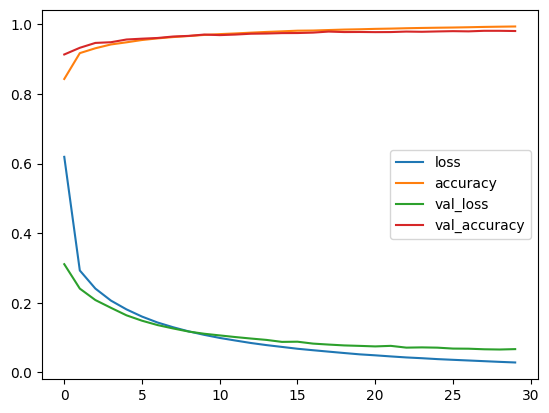

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
# EVALUATING THE MODEL ON UNSEEN(TEST) DATA:
model_clf.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0705 - accuracy: 0.9777


[0.07045862823724747, 0.9776999950408936]

In [ ]:
x_new = X_test[:3]

In [ ]:
actual = y_test[:3]
actual

array([7, 2, 1], dtype=uint8)

In [ ]:
# CALCULATING THE PROBABILITIES OF THE DIGIT:
y_prob = model_clf.predict(x_new)
y_prob.round(3)

1/1 [==============================] - 0s 28ms/step


array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.998, 0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.001,
        0.   ]], dtype=float32)

In [ ]:
# TAKING OUT THE MAX PROBABILITIES:
y_pred = np.argmax(y_prob , axis=-1)

In [ ]:
y_pred

array([7, 2, 1])

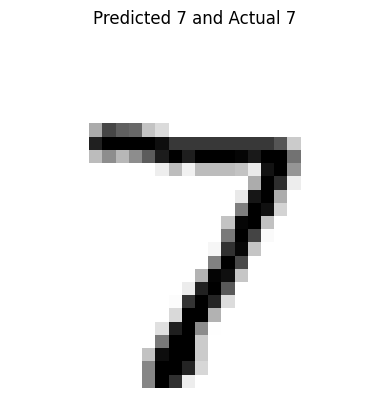

######################


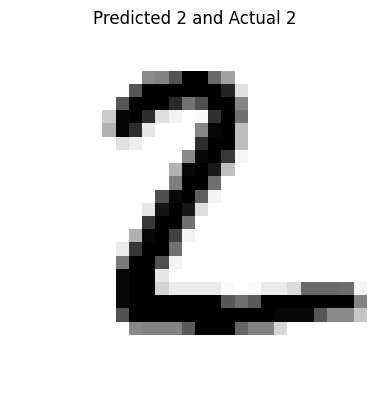

######################


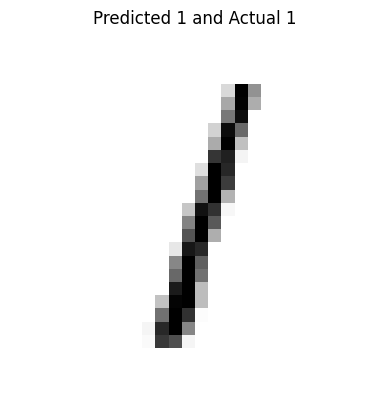

######################


In [ ]:
# plot
for data, pred, actual_data in zip(x_new, y_pred, actual):
  plt.imshow(data, cmap="binary")
  plt.title(f"Predicted {pred} and Actual {actual_data}")
  plt.axis("off")
  plt.show()
  print("######################")